<a href="https://colab.research.google.com/github/FaithOsamaye/Lego-Python/blob/main/Lego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image


In [ ]:
uploaded = files.upload()

Saving lego-2539844_1280.jpg to lego-2539844_1280 (1).jpg


# **Introduction**

LEGO sets released from 1970 to 2022, including details on each set's theme, pieces, recommended age, retail price, and image.



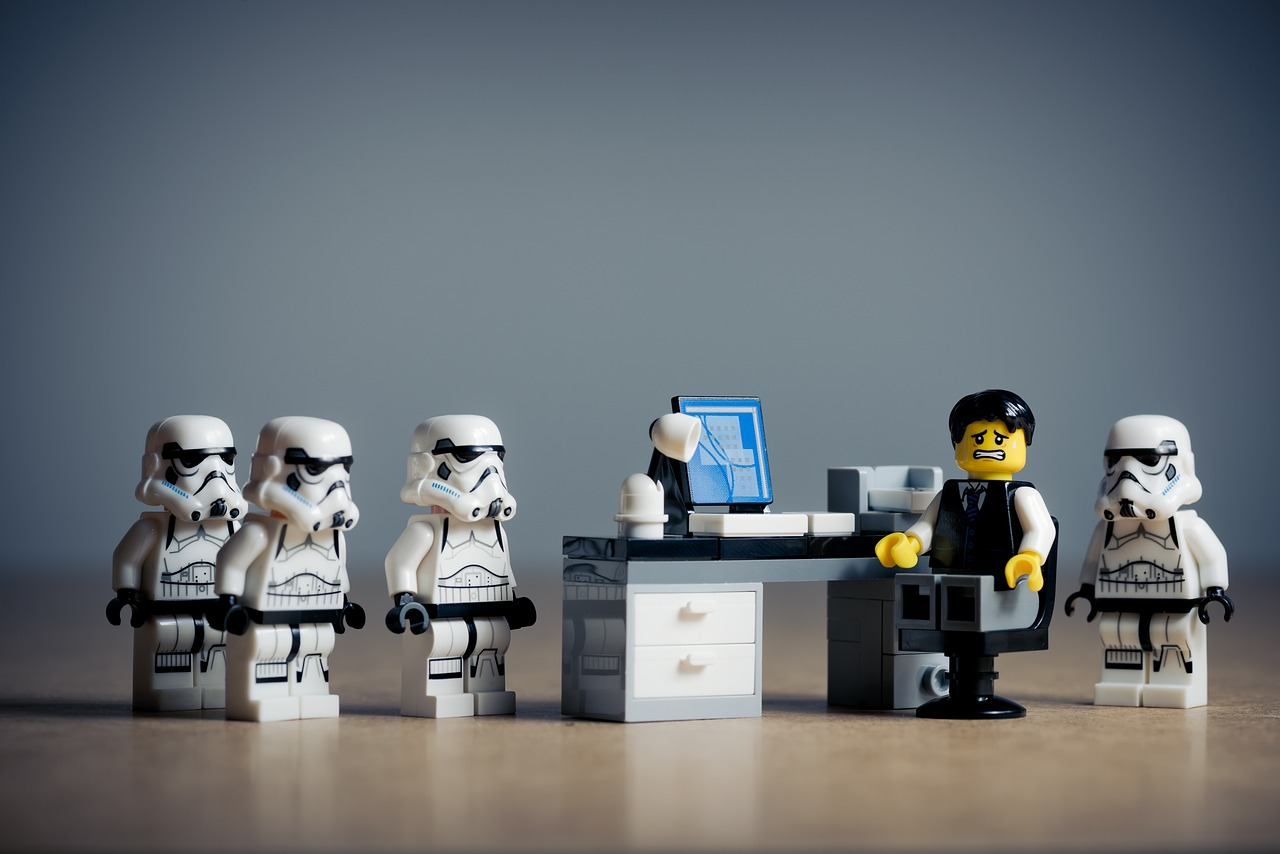

In [ ]:
Image('lego-2539844_1280.jpg',width=1200)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
lego = pd.read_csv('/content/lego_sets.csv',parse_dates=True)

**Exploratory Data Analysis**

In [ ]:
lego.shape

(18457, 14)

In [ ]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          14533 non-null  float64
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


In [ ]:
lego.describe()

,year,pieces,minifigs,agerange_min,US_retailPrice
count,18457.000000,14533.000000,8399.000000,6787.000000,6982.000000
mean,2007.960611,226.473749,2.663650,6.637542,37.534817
std,11.948666,469.988785,2.897857,2.780091,54.382712
min,1970.000000,0.000000,1.000000,1.000000,1.490000
25%,2001.000000,23.000000,1.000000,5.000000,9.990000
50%,2011.000000,70.000000,2.000000,6.000000,19.990000
75%,2017.000000,242.000000,3.000000,8.000000,39.990000
max,2022.000000,11695.000000,80.000000,18.000000,849.990000


**Missing Values**

In [ ]:
lego.isnull().sum()

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

**Duplicates**

In [ ]:
lego.duplicated().sum()

0

**Dropping columns**

In [ ]:
lego.drop(['subtheme','bricksetURL','thumbnailURL','imageURL'],axis=1,inplace=True)

**Handling missing values**

In [ ]:
piece_filling = lego['pieces'].mode().iloc[0]

lego['pieces'].fillna(piece_filling, inplace=True)

In [ ]:
minifig_filling = lego['minifigs'].mode().iloc[0]

lego['minifigs'].fillna(minifig_filling, inplace = True)

In [ ]:
agerange_min_filling = lego['agerange_min'].median()

lego['agerange_min'].fillna(agerange_min_filling, inplace=True)

In [ ]:
Us_price_filling =lego['US_retailPrice'].mode().iloc[0]
lego['US_retailPrice'].fillna(Us_price_filling, inplace=True)

In [ ]:
lego['themeGroup'].fillna('Undefined', inplace=True)

In [ ]:
lego.isnull().sum()

set_id            0
name              0
year              0
theme             0
themeGroup        0
category          0
pieces            0
minifigs          0
agerange_min      0
US_retailPrice    0
dtype: int64

**Questions And Answer**

**1. Our total US retail price is 491453.34, What year made the most sales?**

In [ ]:
bins=[1960,2000,2010,2022]
labels =['90s(1960-1999)','Early 2000s(2000-2010)','Late 2000s(2011-2022)']

lego['year_category'] = pd.cut(lego['year'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Sales price over the years')

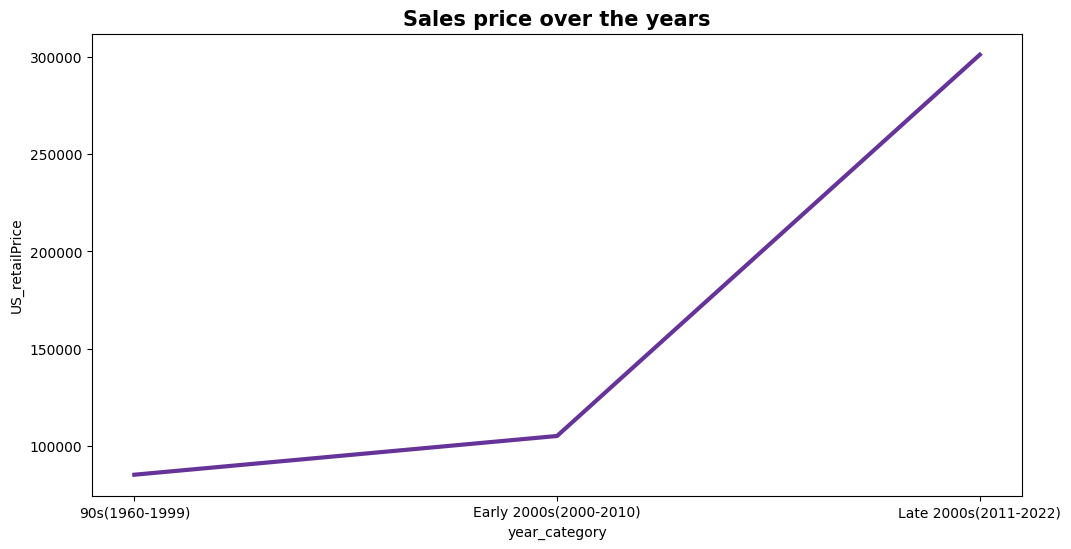

In [ ]:
year_grouped=lego.groupby('year_category')['US_retailPrice'].sum().reset_index()
year_grouped=year_grouped.sort_values('US_retailPrice',ascending =True)
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='year_category', y='US_retailPrice',data=year_grouped,color = 'rebeccapurple', lw=3)
plt.title('Sales price over the years',weight='bold',fontsize='15')

**2. What is the total game that was produced according to the year category?**

Text(0.5, 1.0, 'Count of games produced by year')

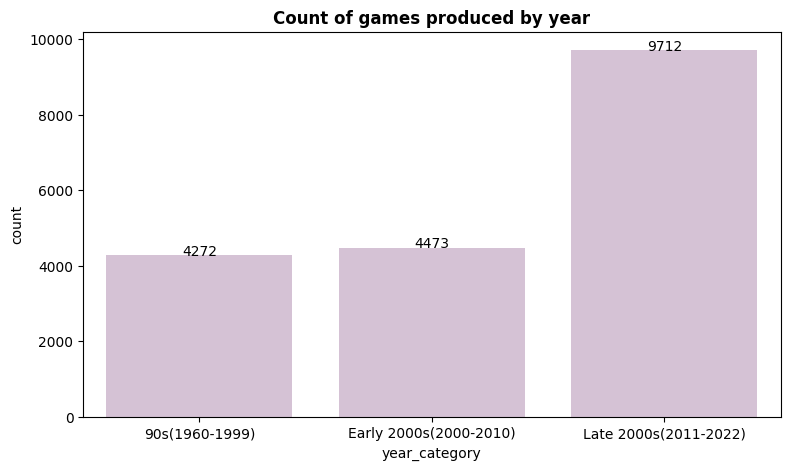

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x='year_category', data=lego,color='thistle')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
plt.title('Count of games produced by year', weight='bold')

**3.What theme was most loved?**

In [ ]:
top_5 = lego['theme'].value_counts().nlargest(n=5)
bottom_5 =lego['theme'].value_counts().nsmallest(n=5)
bottom_5_sorted = bottom_5.sort_values(ascending=False)

Text(0.5, 0, 'Themes')

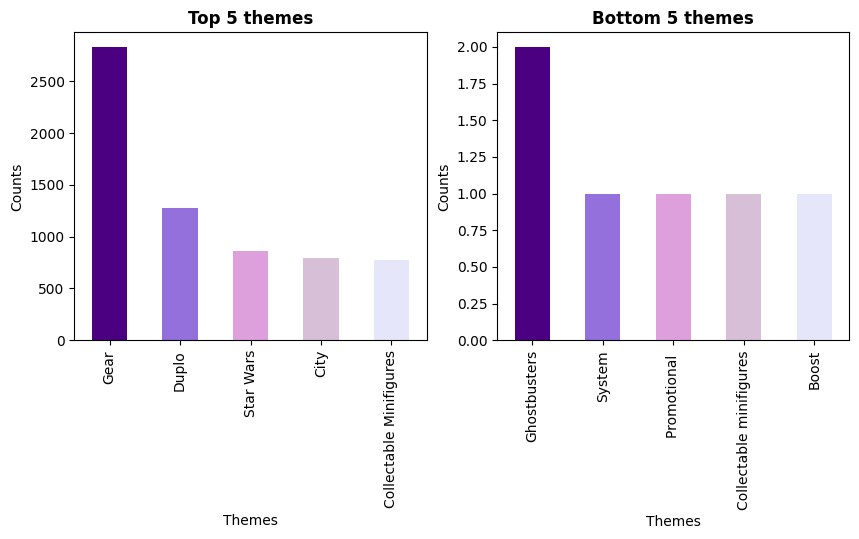

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
col = ['indigo','mediumpurple','plum','thistle','lavender']
top_5.plot(kind='bar', ax=axes[0],color=col)
bottom_5_sorted.plot(kind='bar',ax=axes[1],color=col)
axes[0].set_title('Top 5 themes', weight='bold')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Themes')
axes[1].set_title('Bottom 5 themes',weight='bold')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Themes')

**4. What is the distribution of age range in our data?**

In [ ]:
bins = [0,3,5,13,18]
labels=['toddler (ages 1–2 years)','preschooler (ages 3–4 years)','school-aged child (ages 5–12 years)','teens (ages 13–18 years)']

lego['age_range']=pd.cut(lego['agerange_min'],bins=bins,labels=labels)

In [ ]:
age_ranged=lego['age_range'].value_counts()
fig = px.pie(values=age_ranged.values, names=age_ranged.index, color=age_ranged.index,title='Age_range Distribution',
             color_discrete_map={'toddler (ages 1–2 years)':'blueviolet',
                                 'preschooler (ages 3–4 years)':'plum',
                                 'school-aged child (ages 5–12 years)':'darkmagenta',
                                 'teens (ages 13–18 years)':'indigo'})

fig.show()


**5. What category was the most bought amongst the age category?**

<Figure size 1000x600 with 0 Axes>

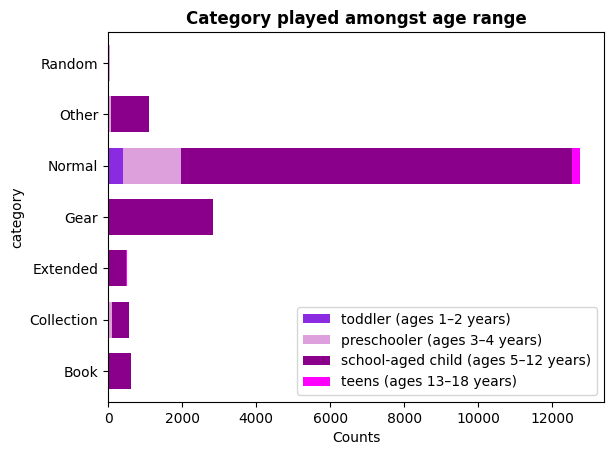

In [ ]:
plt.figure(figsize=(10,6))
col=['blueviolet','plum','darkmagenta','fuchsia']
age_range_category =lego.groupby(['category','age_range']).size().unstack()
age_range_category.plot(kind='barh', stacked=True,color=col,width=0.7)
plt.title('Category played amongst age range', weight='bold')
plt.xlabel('Counts')
plt.legend(loc=4)

**6. Find out how many of the age range played for each year?**

Text(0.5, 0, 'Counts')

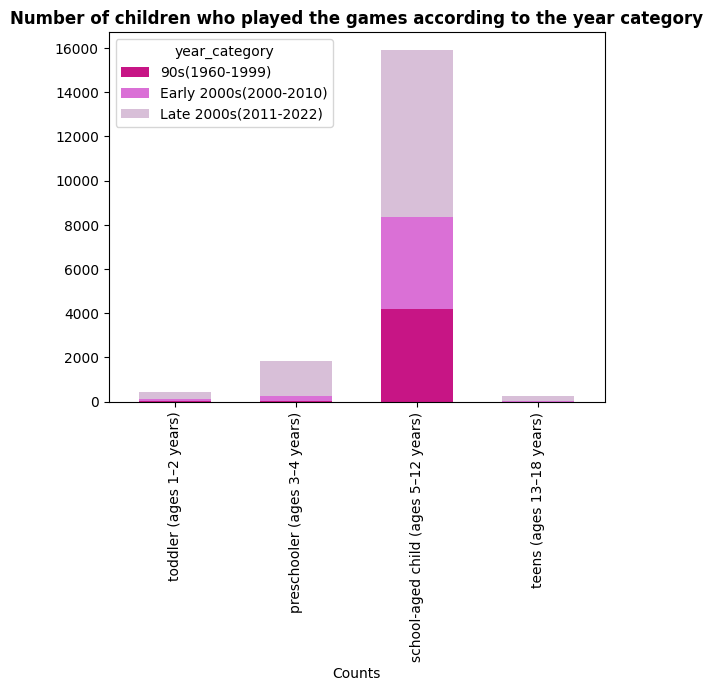

In [ ]:
ay=lego.groupby(['age_range', 'year_category']).size().unstack()
col =['mediumvioletred','orchid','thistle']
ay.plot(kind='bar', stacked=True,color=col, width=0.6)
plt.title('Number of children who played the games according to the year category', weight='bold')
plt.xlabel('Counts')

**7. What game had the highest pieces?**



Text(0.5, 1.0, 'Top 5 games with the highest number of pieces')

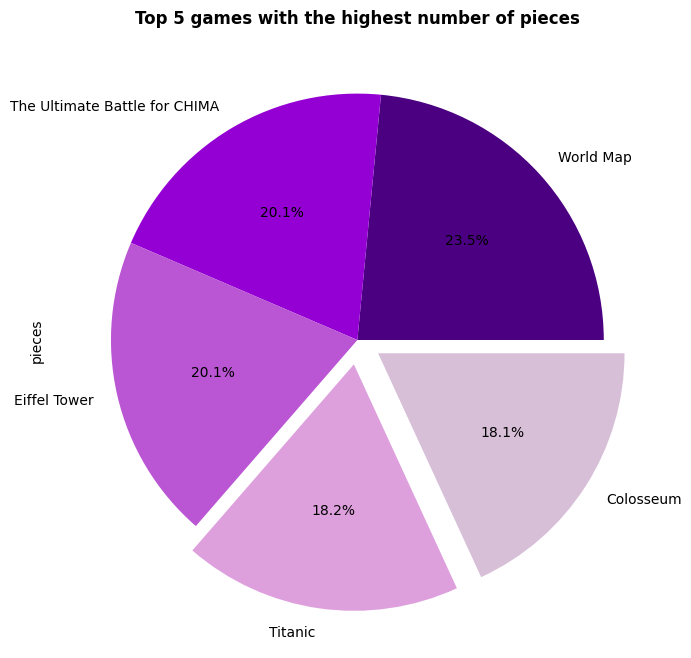

In [ ]:
plt.figure(figsize=(12,8))
games = lego.groupby('name')['pieces'].max().nlargest(n=5)
explode=(0, 0, 0, 0.1,0.1)
col=['indigo','darkviolet','mediumorchid','plum','thistle']
games.plot(kind='pie',autopct='%1.1f%%', explode=explode,colors=col)
plt.title('Top 5 games with the highest number of pieces', weight='bold')


**8. How many miniifigs were in each category**

In [ ]:
!pip install squarify
import squarify

Text(0.5, 1.0, 'Count of minifigs by category')

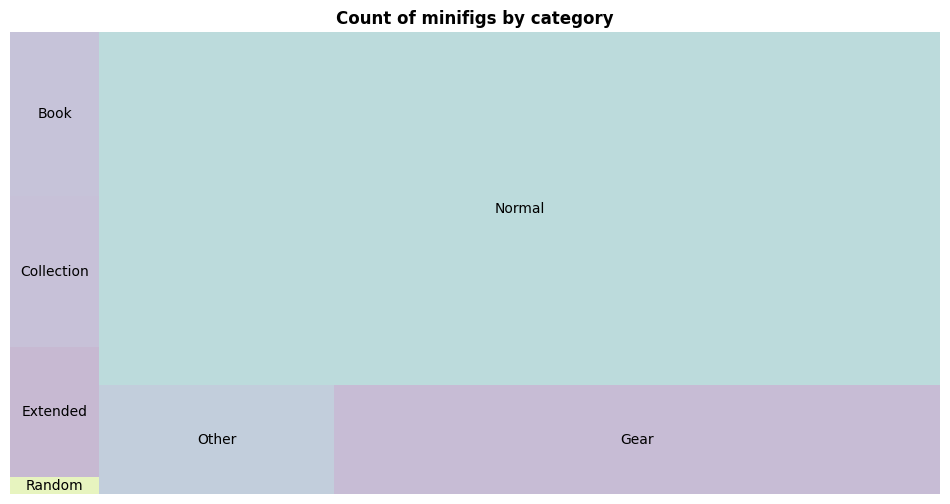

In [ ]:
mini = lego.groupby('category')['minifigs'].count().reset_index()
mini=mini.sort_values('minifigs', ascending = True)
plt.figure(figsize=(12,6))
squarify.plot(sizes=mini['minifigs'], label=mini['category'], alpha=.3)
plt.axis('off')
plt.title('Count of minifigs by category', weight='bold')

# **Insights**

1.   The most of our sales were made from 2011-2022(Late200s).

2.   The games produced saw a drastic increase in the late 2000s.

3.   The most loved theme was Gear and the least themes were system, promotional,collectable minifigures and boost with just one theme.

4.   School aged children loved playing legos the most, while teens made a very small portion of our data.

5.   In our data school aged children tend to love every category of the lego games, but the normal category was the most loved.

6. Late 2000s saw a increase in the number if children who played games.

7. World map had the highest number of pieces being 11695.0, followed by Ultimate Battle for CHIMA with 10004 and Eiffel Tower with 10001.

8. The highest  number of minifigs in a game was Normal, followed by gear.




# **Recommendation**

1. If the company is all about making more money then they should definetely make the school aged children their main target audience

2. The gear theme had the most count in our data and the normal category was the most sort after. So, it is of importance more variations of the normal category be produced.

3. The companies should keep making more legos and if new ideas come about it should be put into it as the rise in lego games overtime has skyrocketed.

4. To make teenagers amongst our target audience, we need to do market survey and find out the type of legos that would be more enjoyable to children around that age.

In [ ]:
lego.to_csv('lego_cleaned.csv', index=False)
from google.colab import files

files.download('lego_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>